# Performing Chi$^2$ analysis to see whether the frequency distribution of a dataset matches the expected distribution

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import chi2_contingency

In [5]:
e_comm_data = pd.read_csv('datasets/Womens Clothing E-Commerce Reviews.csv')
e_comm_data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
e_comm_data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [7]:
columns_to_keep = ['Clothing ID', 'Age', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name']

In [9]:
new_e_comm_data = e_comm_data[columns_to_keep]

In [10]:
new_e_comm_data.sample(10)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
14394,1078,36,4,1,0,General Petite,Dresses,Dresses
3607,881,47,5,1,0,General,Tops,Knits
4025,1094,38,5,1,0,General Petite,Dresses,Dresses
19504,875,57,4,1,8,General,Tops,Knits
9909,961,21,5,1,0,General,Jackets,Jackets
22405,877,42,5,1,1,General Petite,Tops,Knits
12774,215,42,4,1,1,Initmates,Intimate,Legwear
5532,861,41,5,1,0,General,Tops,Knits
12443,936,75,5,1,2,General Petite,Tops,Sweaters
8925,1110,61,4,1,1,General,Dresses,Dresses


In [12]:
new_e_comm_data.shape

(23486, 8)

In [13]:
working_data = new_e_comm_data[['Recommended IND', 'Rating']]
working_data.head()

,Recommended IND,Rating
0,1,4
1,1,5
2,0,3
3,1,5
4,1,5


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

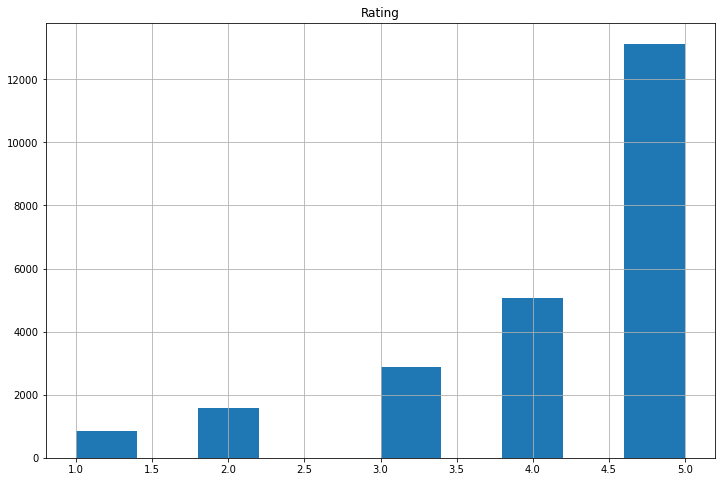

In [14]:
new_e_comm_data[['Rating']].hist(figsize=(12, 8))

In [15]:
df_for_obs = pd.crosstab(new_e_comm_data['Recommended IND'], new_e_comm_data['Rating'])
df_for_obs

Rating,1,2,3,4,5
Recommended IND,,,,,
0,826,1471,1682,168,25
1,16,94,1189,4909,13106


<h4> Using Pearson's Chi$2$ statistic to test for the independence of two categorical variables<h4>

In [16]:
chi2, p_value, degrees_of_freedom, expected_values = chi2_contingency(df_for_obs.values)

<h3>Objective </h3>

Are recommendations **independent** of ratings? Are the observed frequencies of ratings different across these categories?

In [17]:
print('Chi2 stats: {}'.format(round(chi2, 3)))

Chi2 stats: 16722.503


Checking p-values if Chi$2$ is significant or not

In [19]:
print("The p-values: {}".format(p_value))

The p-values: 0.0


This tells us that the Chi$2$ test is significant

In [20]:
print("The degree of freedom: {}".format(degrees_of_freedom))

The degree of freedom: 4


The degree of freedom <br>
= (the number of categories we're working with - 1) <br>
= 5 - 1 <br>
= 4

In [21]:
expected_values

array([[  149.57097846,   278.00306566,   509.99795623,   901.86681427,
         2332.56118539],
       [  692.42902154,  1286.99693434,  2361.00204377,  4175.13318573,
        10798.43881461]])

Expected values are the values that Chi$2$ expected the values to be distributed for both recommended and not recommended product. <br>
First row: Expected distribution for not recommended product <br>
Second row: Expected distribution for recommended product


In [23]:
expected_df = pd.DataFrame({
    '0': expected_values[0],
    '1': expected_values[1]
})
expected_df

,0,1
0,149.570978,692.429022
1,278.003066,1286.996934
2,509.997956,2361.002044
3,901.866814,4175.133186
4,2332.561185,10798.438815


**Barplot visualization of the expected values for 'Ratings' product**

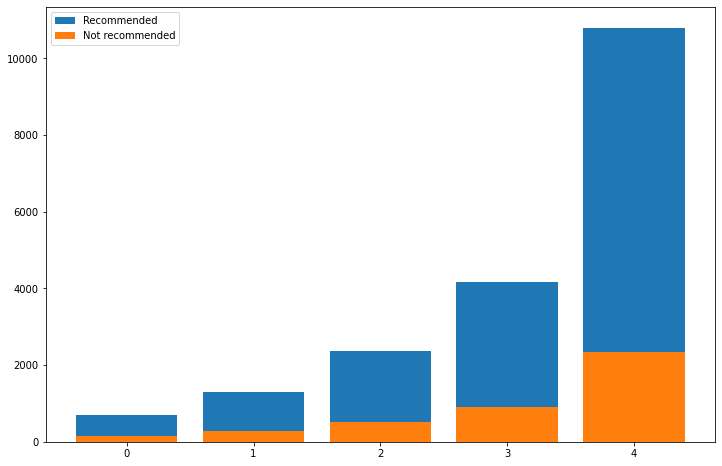

In [24]:
plt.figure(figsize=(12, 8 ))

plt.bar(expected_df.index, expected_df['1'], label='Recommended')
plt.bar(expected_df.index, expected_df['0'], label='Not recommended')

plt.legend()

In [25]:
ratings_recommended = new_e_comm_data[new_e_comm_data['Recommended IND'] == 1]
ratings_not_recommended = new_e_comm_data[new_e_comm_data['Recommended IND'] == 0]

In [26]:
ratings_recommended.shape, ratings_not_recommended.shape

((19314, 8), (4172, 8))

In [27]:
ratings_recommended.sample(10)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
22500,1098,57,5,1,1,General,Dresses,Dresses
3021,999,33,5,1,0,General,Bottoms,Skirts
14885,940,74,3,1,0,General,Tops,Sweaters
5280,895,36,4,1,0,General,Tops,Fine gauge
14005,939,44,4,1,0,General Petite,Tops,Sweaters
10782,1110,43,5,1,0,General Petite,Dresses,Dresses
3553,1077,46,4,1,5,General,Dresses,Dresses
9986,1110,55,5,1,2,General,Dresses,Dresses
11392,1094,52,5,1,0,General Petite,Dresses,Dresses
10833,1110,30,5,1,1,General,Dresses,Dresses


In [28]:
ratings_not_recommended.sample(10)

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2459,1116,63,2,0,5,General,Jackets,Outerwear
20344,872,54,3,0,2,General,Tops,Knits
9693,865,23,2,0,1,General,Tops,Knits
9338,868,38,2,0,1,General Petite,Tops,Knits
14599,1084,40,1,0,11,General,Dresses,Dresses
12990,661,43,1,0,0,General Petite,Intimate,Lounge
19885,1080,39,3,0,0,General Petite,Dresses,Dresses
18818,857,39,3,0,12,General Petite,Tops,Knits
17971,1146,44,3,0,4,General Petite,Trend,Trend
17521,450,36,1,0,11,General,Bottoms,Shorts


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

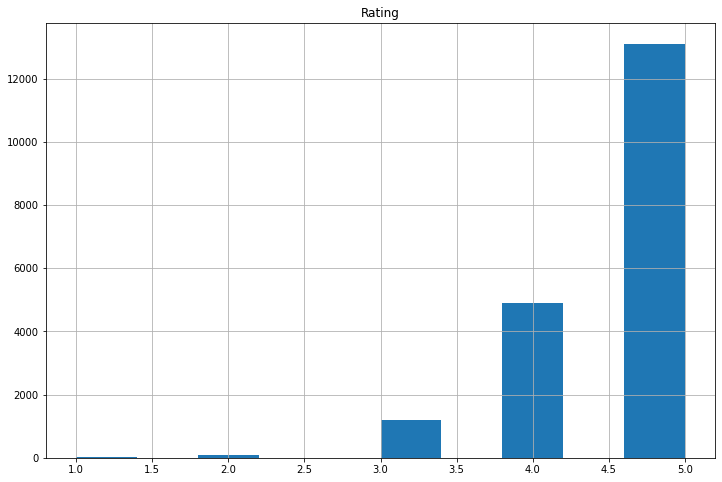

In [29]:
ratings_recommended[['Rating']].hist(figsize=(12, 8))

This shows that only the product with ratings greater than 3 are recommended.

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

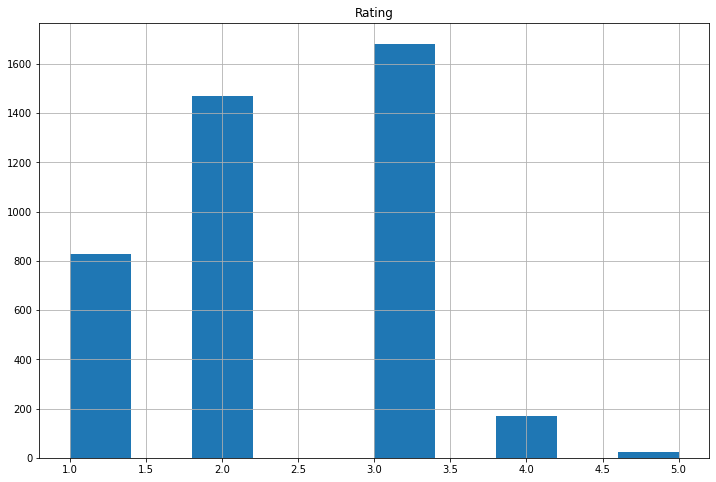

In [30]:
## Visualizing not recommended products
ratings_not_recommended[['Rating']].hist(figsize=(12, 8))

This actually proves that our Chi$2$ analysis got it right

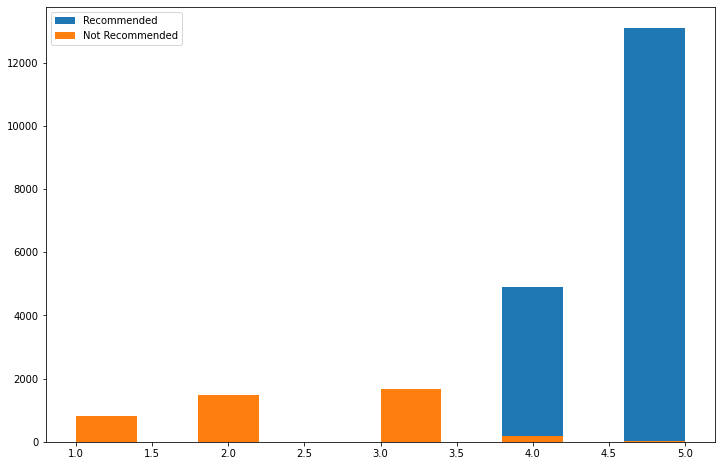

In [32]:
plt.figure(figsize=(12, 8))

plt.hist(ratings_recommended['Rating'], label='Recommended ')
plt.hist(ratings_not_recommended['Rating'], label='Not Recommended')

plt.legend()

**Conclusion**<br>
This shows that the recommendations of e-commerce sites are not indpendent of the ratings of the products.